In [255]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt  # for graphing our mean rewards over time
import pickle  # to save/load Q-Tables
from matplotlib import style  # to make pretty charts because it matters.
import time  # using this to keep track of our saved Q-Tables.

style.use("ggplot")  # setting our style!

In [256]:
# Fetching data
#data = pd.read_csv('drebinAndroidMalwareDetectionDataset.csv')
data = pd.read_csv('drebinAndroidDataset.csv')
print(data.shape)
data.head()

(15036, 216)


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [257]:
#Checking for null values in the dataset
data[data.columns[215]].isnull().value_counts()

False    15036
Name: class, dtype: int64

In [258]:
# Mark malware - '1' and non as - '0'
data=data.replace(["S","B"],[1,0])
data.rename(columns={'class':'MALWARE'},inplace=True)
print(data.shape)
data.head()

(15036, 216)


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,MALWARE
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [259]:
#Shuffle the dataset
data = shuffle(data)
print(data.shape)
data.head()

(15036, 216)


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,MALWARE
14094,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,1,0,0,0,0
9791,0,0,0,0,0,0,0,1,1,1,...,1,0,0,0,1,1,0,0,0,0
7858,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,1,0,0,0,0
13803,1,1,1,1,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
960,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [260]:
#Reading from Random Forest output
selected_features = []
myFile = open("rf_old.txt", "r")
for myLine in myFile:
    selected_features.append(int(myLine))
print(selected_features)    

[0, 1, 2, 3, 6, 10, 12, 13, 17, 18, 21, 25, 43, 52, 68]


In [261]:
#Working with first 15 features
X = data.iloc[:, selected_features].values
Y = data.iloc[:, -1].values
print(X.shape)
print(X)
print(Y.shape)
print(Y)

(15036, 15)
[[1 1 1 ... 0 1 1]
 [0 0 0 ... 0 1 1]
 [1 1 1 ... 0 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
(15036,)
[0 0 0 ... 0 0 1]


In [262]:
#Dividing the data set into 70% training and 30% testing data sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

print('X_train- ',X_train.shape)
print(X_train)
print('Y_train- ',Y_train.shape)
print(Y_train)
print('X_test- ',X_test.shape)
print(X_test)
print('Y_test- ',Y_test.shape)
print(Y_test)

X_train-  (10525, 15)
[[1 1 1 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 1 1]]
Y_train-  (10525,)
[0 1 0 ... 1 1 1]
X_test-  (4511, 15)
[[0 0 0 ... 0 1 1]
 [1 1 1 ... 0 1 0]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 1 1 ... 0 1 0]
 [0 0 0 ... 1 1 1]]
Y_test-  (4511,)
[1 0 1 ... 1 0 1]


In [263]:
X_SIZE = 10525
X_test_SIZE = 4511

In [264]:
# mapping each i to its combination
SIZE=15
x_table = {}
for i in range(X_SIZE):
    a = 0
    for j in range(SIZE):
        a = a*2 + int(X_train[i][j])   
    if a in x_table:
        x_table[a].append(i)
    else:
        x_table[a] = []
        x_table[a].append(i)
#print(f"x_table : {x_table}")

In [265]:
#declaring variables
HM_EPISODES = 100  # No of episodes
epsilon = 0.9
EPS_DECAY = 0.9998  # Every episode will be epsilon*EPS_DECAY
SHOW_EVERY = 25  
episode_rewards = []

start_q_table = None 

LEARNING_RATE = 0.00001
DISCOUNT = 0.95

In [266]:
def find_accuracy(q_table):
    correct = 0
    wrong = 0
    for i in range(X_test_SIZE):
        a = 0
        for j in range(SIZE):
            a = a*2 + int(X_test[i][j])   
        ans = int(np.argmax(q_table[a]))
        if ans == Y_test[i]:
            correct += 1
        else:
            wrong += 1
    accuracy = correct/(correct+wrong)
    #print(f"accuracy: {accuracy*100} %")
    return accuracy*100

In [267]:
def find_f_score(q_table):
    Y_predicted = []
    for i in range(4511):
            a = 0
            for j in range(SIZE):
                a = a*2 + int(X_test[i][j])   
            ans = int(np.argmax(q_table[a]))
            Y_predicted.append(ans)
    #print(len(Y_predicted))  
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(Y_test, Y_predicted)
    #print('F1 score: %f' % f1)
    return f1

In [268]:
def action_fun(choice):
    if choice == 0:
        return 0
    elif choice == 1:
        return 1

In [269]:
def reward_fun(i,action):
    correct_reward = 1
    wrong_penalty = -1
    if i in x_table:
        select = x_table[i]
        select_i = select[np.random.randint(0, len(select))]
        if action == Y_train[select_i] :
            reward = correct_reward
        else:
            reward = wrong_penalty
        #print(f"reward on: {i} , at action: {action},select i : {select_i} at correct action: {Y_train[select_i]} is: {reward}")
        return reward    
    else:
        return  np.random.randint(-1, 1) 

In [270]:
# Q_table
def create_q_table(q_table):
    for i in range(0,pow(2,SIZE)):
        q_table[i] = (0,0)
    return q_table

In [271]:
accuracy_matrix = []
f_score_matrix = []
x_axis_matrix = []
final_q_table = {}
max_accuracy = 0
for itr in range(1,15):
    q_table = {}
    q_table = create_q_table(q_table)
    epsilon = 0.9
    LEARNING_RATE = LEARNING_RATE * 2.5
    print(f"On #{itr}, LEARNING_RATE is {LEARNING_RATE}")
    for episode in range(HM_EPISODES):
        if episode % SHOW_EVERY == 0:
            print(f"On #{episode}, epsilon is {epsilon}")
            print(f"{SHOW_EVERY} ep mean: {np.mean(episode_rewards[-SHOW_EVERY:])}")

        episode_reward = 0
        for i in range(0,pow(2,SIZE)):
            obs = i
            if np.random.random() > epsilon:
                # GET THE ACTION
                action = action_fun( int(np.argmax(q_table[i])) )
            else:
                action = action_fun( np.random.randint(0, 1) )
            reward = reward_fun(i,action)

            new_obs = (i+1)%pow(2,SIZE)
            max_future_q = np.max(q_table[new_obs])
            current_q = q_table[obs][action]
            if reward < 0:
                new_q = reward
            else:
                new_q = (1 - LEARNING_RATE) * current_q +  LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            temp = q_table[obs]
            if(action == 0):
                q_table[obs] = (new_q,temp[1])
            else:
                q_table[obs] = (temp[0],new_q)
            #print(f"q_table[obs]: {q_table[obs]}")  
            episode_reward += reward

        episode_rewards.append(episode_reward)
        epsilon *= EPS_DECAY  
    accuracy = find_accuracy(q_table)
    accuracy_matrix.append(accuracy) 
    f_score = find_f_score(q_table)
    f_score_matrix.append(f_score)
    x_axis_matrix.append(LEARNING_RATE)
    print(f"At Learning Rate: {LEARNING_RATE} -> accuracy: {accuracy} % , f1_score: {f_score}")
    if max_accuracy < accuracy:
        final_q_table = q_table
        max_accuracy = accuracy            

On #1, LEARNING_RATE is 2.5e-05
On #0, epsilon is 0.9
25 ep mean: nan


/home/ipc/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ipc/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


On #25, epsilon is 0.8955107834582012
25 ep mean: -15449.64
On #50, epsilon is 0.8910439592110236
25 ep mean: -15477.52
On #75, epsilon is 0.8865994155652902
25 ep mean: -15445.52
4511
At Learning Rate: 2.5e-05 -> accuracy: 87.18687652405231 % , f1_score: 0.79178674351585
On #2, LEARNING_RATE is 6.25e-05
On #0, epsilon is 0.9
25 ep mean: -15410.56
On #25, epsilon is 0.8955107834582012
25 ep mean: -15484.72
On #50, epsilon is 0.8910439592110236
25 ep mean: -15443.52
On #75, epsilon is 0.8865994155652902
25 ep mean: -15450.92
4511
At Learning Rate: 6.25e-05 -> accuracy: 89.29283972511638 % , f1_score: 0.8312958435207823
On #3, LEARNING_RATE is 0.00015625
On #0, epsilon is 0.9
25 ep mean: -15470.36
On #25, epsilon is 0.8955107834582012
25 ep mean: -15455.24
On #50, epsilon is 0.8910439592110236
25 ep mean: -15424.88
On #75, epsilon is 0.8865994155652902
25 ep mean: -15442.72
4511
At Learning Rate: 0.00015625 -> accuracy: 86.5661715805808 % , f1_score: 0.7778592375366569
On #4, LEARNING_RA

In [272]:
print(accuracy_matrix)

[87.18687652405231, 89.29283972511638, 86.5661715805808, 87.65240523165595, 89.04899135446685, 88.3617823099091, 89.55885612946132, 87.9405896696963, 91.37663489248503, 86.14497894036799, 90.57858567945023, 88.25094214143205, 57.17135890046553, 34.42695632897362]


In [278]:
print(x_axis_matrix)

[2.5e-05, 6.25e-05, 0.00015625, 0.000390625, 0.0009765625, 0.00244140625, 0.006103515625, 0.0152587890625, 0.03814697265625, 0.095367431640625, 0.2384185791015625, 0.5960464477539062, 1.4901161193847656, 3.725290298461914]


In [277]:
print(f_score_matrix)

[0.79178674351585, 0.8312958435207823, 0.7778592375366569, 0.7997123336929163, 0.8266666666666667, 0.8311354133161789, 0.8366285119667013, 0.8069552874378993, 0.8702035368702036, 0.7694577646624862, 0.856467409658899, 0.8119233498935415, 0.34949494949494947, 0.027613412228796843]


In [273]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [274]:
Y_predicted = []
for i in range(4511):
        a = 0
        for j in range(SIZE):
            a = a*2 + int(X_test[i][j])   
        ans = int(np.argmax(final_q_table[a]))
        Y_predicted.append(ans)
print(len(Y_predicted))        

4511


In [275]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, Y_predicted)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_predicted)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_predicted)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, Y_predicted)
print('F1 score: %f' % f1)

# confusion matrix
matrix = confusion_matrix(Y_test, Y_predicted)
print(matrix)

Accuracy: 0.913766
Precision: 0.964497
Recall: 0.792705
F1 score: 0.870204
[[2818   48]
 [ 341 1304]]


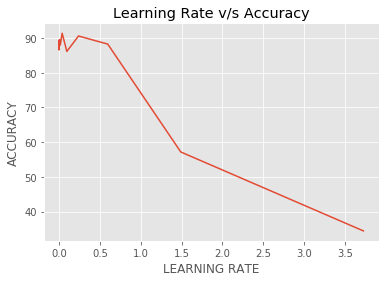

In [276]:
plt.plot(x_axis_matrix, accuracy_matrix) 
  
# naming the x axis 
plt.xlabel('LEARNING RATE') 
# naming the y axis 
plt.ylabel('ACCURACY') 
  
# giving a title to my graph 
plt.title('Learning Rate v/s Accuracy') 
  
# function to show the plot 
plt.show() 